In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 로드

In [2]:
train = pd.read_csv('data/train.csv', parse_dates=['Dates'])
test = pd.read_csv('data/test.csv', parse_dates=['Dates'])
train.shape, test.shape

((878049, 9), (884262, 7))

In [3]:
train.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [4]:
test.head()

Id               Dates DayOfWeek PdDistrict                   Address  \
0   0 2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1 2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2 2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3 2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4 2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  
0 -122.399588  37.735051  
1 -122.391523  37.732432  
2 -122.426002  37.792212  
3 -122.437394  37.721412  
4 -122.437394  37.721412

In [5]:
test = test.set_index("Id")
test.head()

Dates DayOfWeek PdDistrict                   Address  \
Id                                                                      
0  2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1  2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2  2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

             X          Y  
Id                         
0  -122.399588  37.735051  
1  -122.391523  37.732432  
2  -122.426002  37.792212  
3  -122.437394  37.721412  
4  -122.437394  37.721412

## 데이터 병합

In [6]:
df = pd.concat([train, test])
df.shape

(1762311, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762311 entries, 0 to 884261
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Dates       datetime64[ns]
 1   Category    object        
 2   Descript    object        
 3   DayOfWeek   object        
 4   PdDistrict  object        
 5   Resolution  object        
 6   Address     object        
 7   X           float64       
 8   Y           float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 134.5+ MB


In [8]:
df["year"] = df["Dates"].dt.year
df["month"] = df["Dates"].dt.month
df["day"] = df["Dates"].dt.day
df["hour"] = df["Dates"].dt.hour
df["dayofweek"] = df["Dates"].dt.dayofweek
df["day_name"] = df["Dates"].dt.day_name()
df.iloc[:, -6:].head()

year  month  day  hour  dayofweek   day_name
0  2015      5   13    23          2  Wednesday
1  2015      5   13    23          2  Wednesday
2  2015      5   13    23          2  Wednesday
3  2015      5   13    23          2  Wednesday
4  2015      5   13    23          2  Wednesday

## 기술통계

In [9]:
df.describe()

X             Y          year         month           day  \
count  1.762311e+06  1.762311e+06  1.762311e+06  1.762311e+06  1.762311e+06   
mean  -1.224227e+02  3.777125e+01  2.008708e+03  6.375071e+00  1.561060e+01   
std    3.067205e-02  4.711145e-01  3.634536e+00  3.448681e+00  8.829256e+00   
min   -1.225136e+02  3.770788e+01  2.003000e+03  1.000000e+00  1.000000e+00   
25%   -1.224330e+02  3.775239e+01  2.006000e+03  3.000000e+00  8.000000e+00   
50%   -1.224165e+02  3.777542e+01  2.009000e+03  6.000000e+00  1.600000e+01   
75%   -1.224070e+02  3.778436e+01  2.012000e+03  9.000000e+00  2.300000e+01   
max   -1.205000e+02  9.000000e+01  2.015000e+03  1.200000e+01  3.100000e+01   

               hour     dayofweek  
count  1.762311e+06  1.762311e+06  
mean   1.340431e+01  2.989020e+00  
std    6.554258e+00  1.970560e+00  
min    0.000000e+00  0.000000e+00  
25%    9.000000e+00  1.000000e+00  
50%    1.400000e+01  3.000000e+00  
75%    1.900000e+01  5.000000e+00  
max    2.300000e+01  6.000000e+00

In [10]:
df.describe().style.format("{:.2f}")

In [11]:
df.describe(include="object")

Category                      Descript DayOfWeek PdDistrict  \
count          878049                        878049   1762311    1762311   
unique             39                           879         7         10   
top     LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Friday   SOUTHERN   
freq           174900                         60022    268437     314638   

       Resolution                 Address day_name  
count      878049                 1762311  1762311  
unique         17                   24777        7  
top          NONE  800 Block of BRYANT ST   Friday  
freq       526790                   53517   268437

## label 확인

In [12]:
df["Category"].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

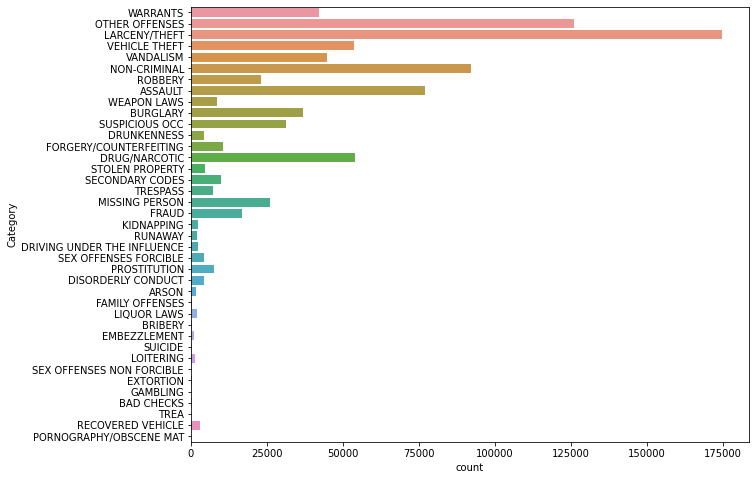

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y="Category")

## PdDistrict
* 경찰서 구의 이름

In [14]:
df["PdDistrict"].value_counts()

SOUTHERN      314638
MISSION       240357
NORTHERN      212313
BAYVIEW       179022
CENTRAL       171590
TENDERLOIN    163556
INGLESIDE     158929
TARAVAL       132213
PARK           99512
RICHMOND       90181
Name: PdDistrict, dtype: int64

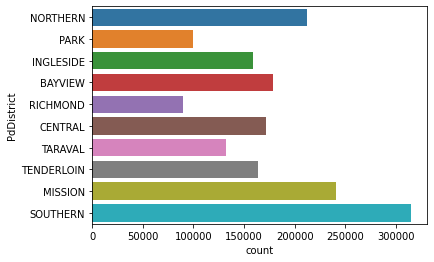

In [15]:
sns.countplot(data=df, y="PdDistrict")

## 경위도

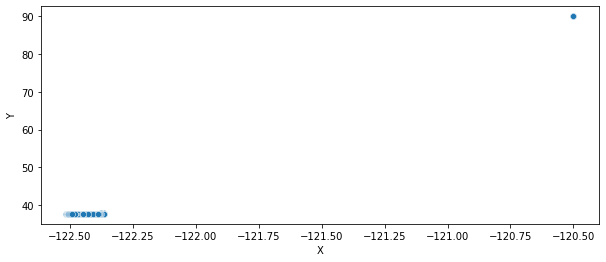

In [16]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x="X", y="Y")

In [17]:
# 경위도가 잘못 입력된 데이터 수
df[df["Y"] > 80].shape

(143, 15)

In [18]:
# 경위도가 잘못 입력된 데이터 수
train[train["Y"] > 80].shape

(67, 9)

In [19]:
# 경위도가 잘못 입력된 데이터 수
test[test["Y"] > 80].shape

(76, 6)

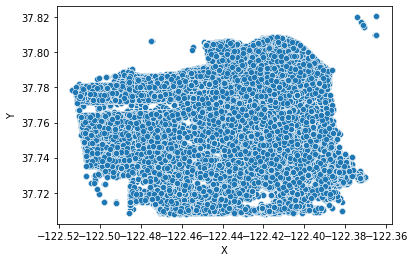

In [20]:
sns.scatterplot(data=df[df["Y"] < 80], x="X", y="Y")

## 오류 데이터

In [21]:
train.loc[train["Y"] > 80, "PdDistrict"].value_counts()

TENDERLOIN    15
NORTHERN      12
BAYVIEW        9
SOUTHERN       8
RICHMOND       7
CENTRAL        5
TARAVAL        4
INGLESIDE      4
PARK           2
MISSION        1
Name: PdDistrict, dtype: int64

In [22]:
train.loc[train["Y"] > 80, "Category"].value_counts()

OTHER OFFENSES           17
LARCENY/THEFT            15
VEHICLE THEFT             9
WARRANTS                  8
ASSAULT                   4
NON-CRIMINAL              4
SUSPICIOUS OCC            2
DISORDERLY CONDUCT        2
TRESPASS                  1
VANDALISM                 1
BURGLARY                  1
STOLEN PROPERTY           1
SEX OFFENSES FORCIBLE     1
ROBBERY                   1
Name: Category, dtype: int64

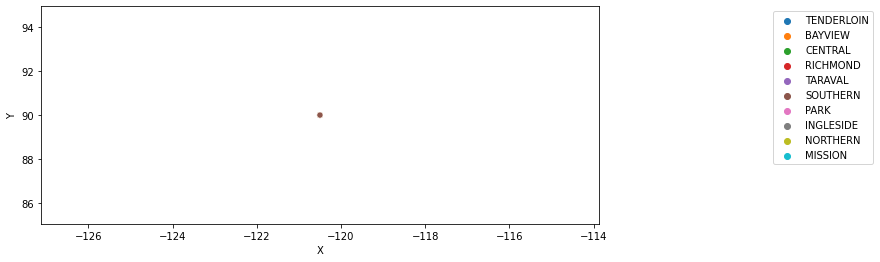

In [23]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=train[train["Y"] > 80], x="X", y="Y", hue="PdDistrict")
plt.legend(bbox_to_anchor=(1.5, 1))

## 경위도

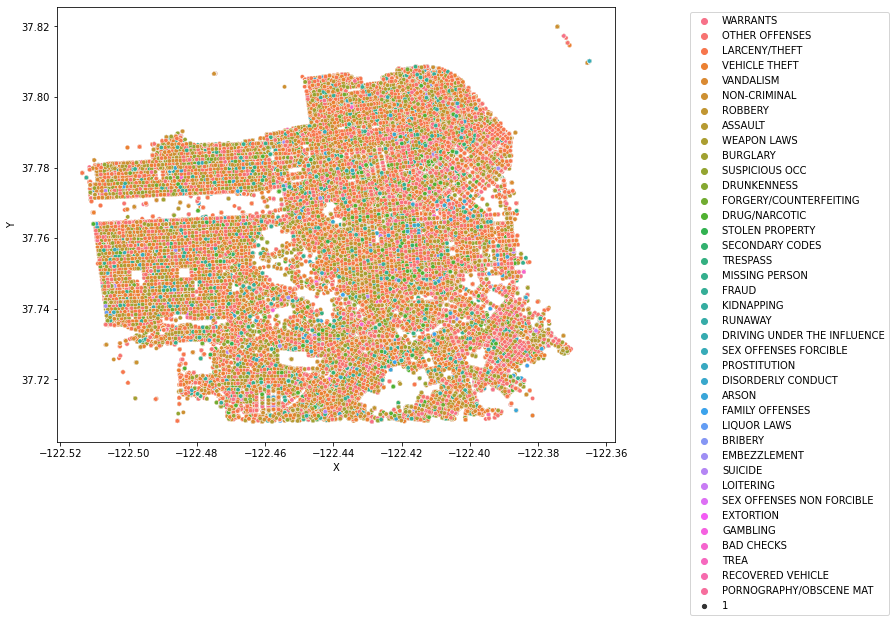

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train[train["Y"] < 80], x="X", y="Y", hue="Category", size=1)
plt.legend(bbox_to_anchor=(1.5, 1))

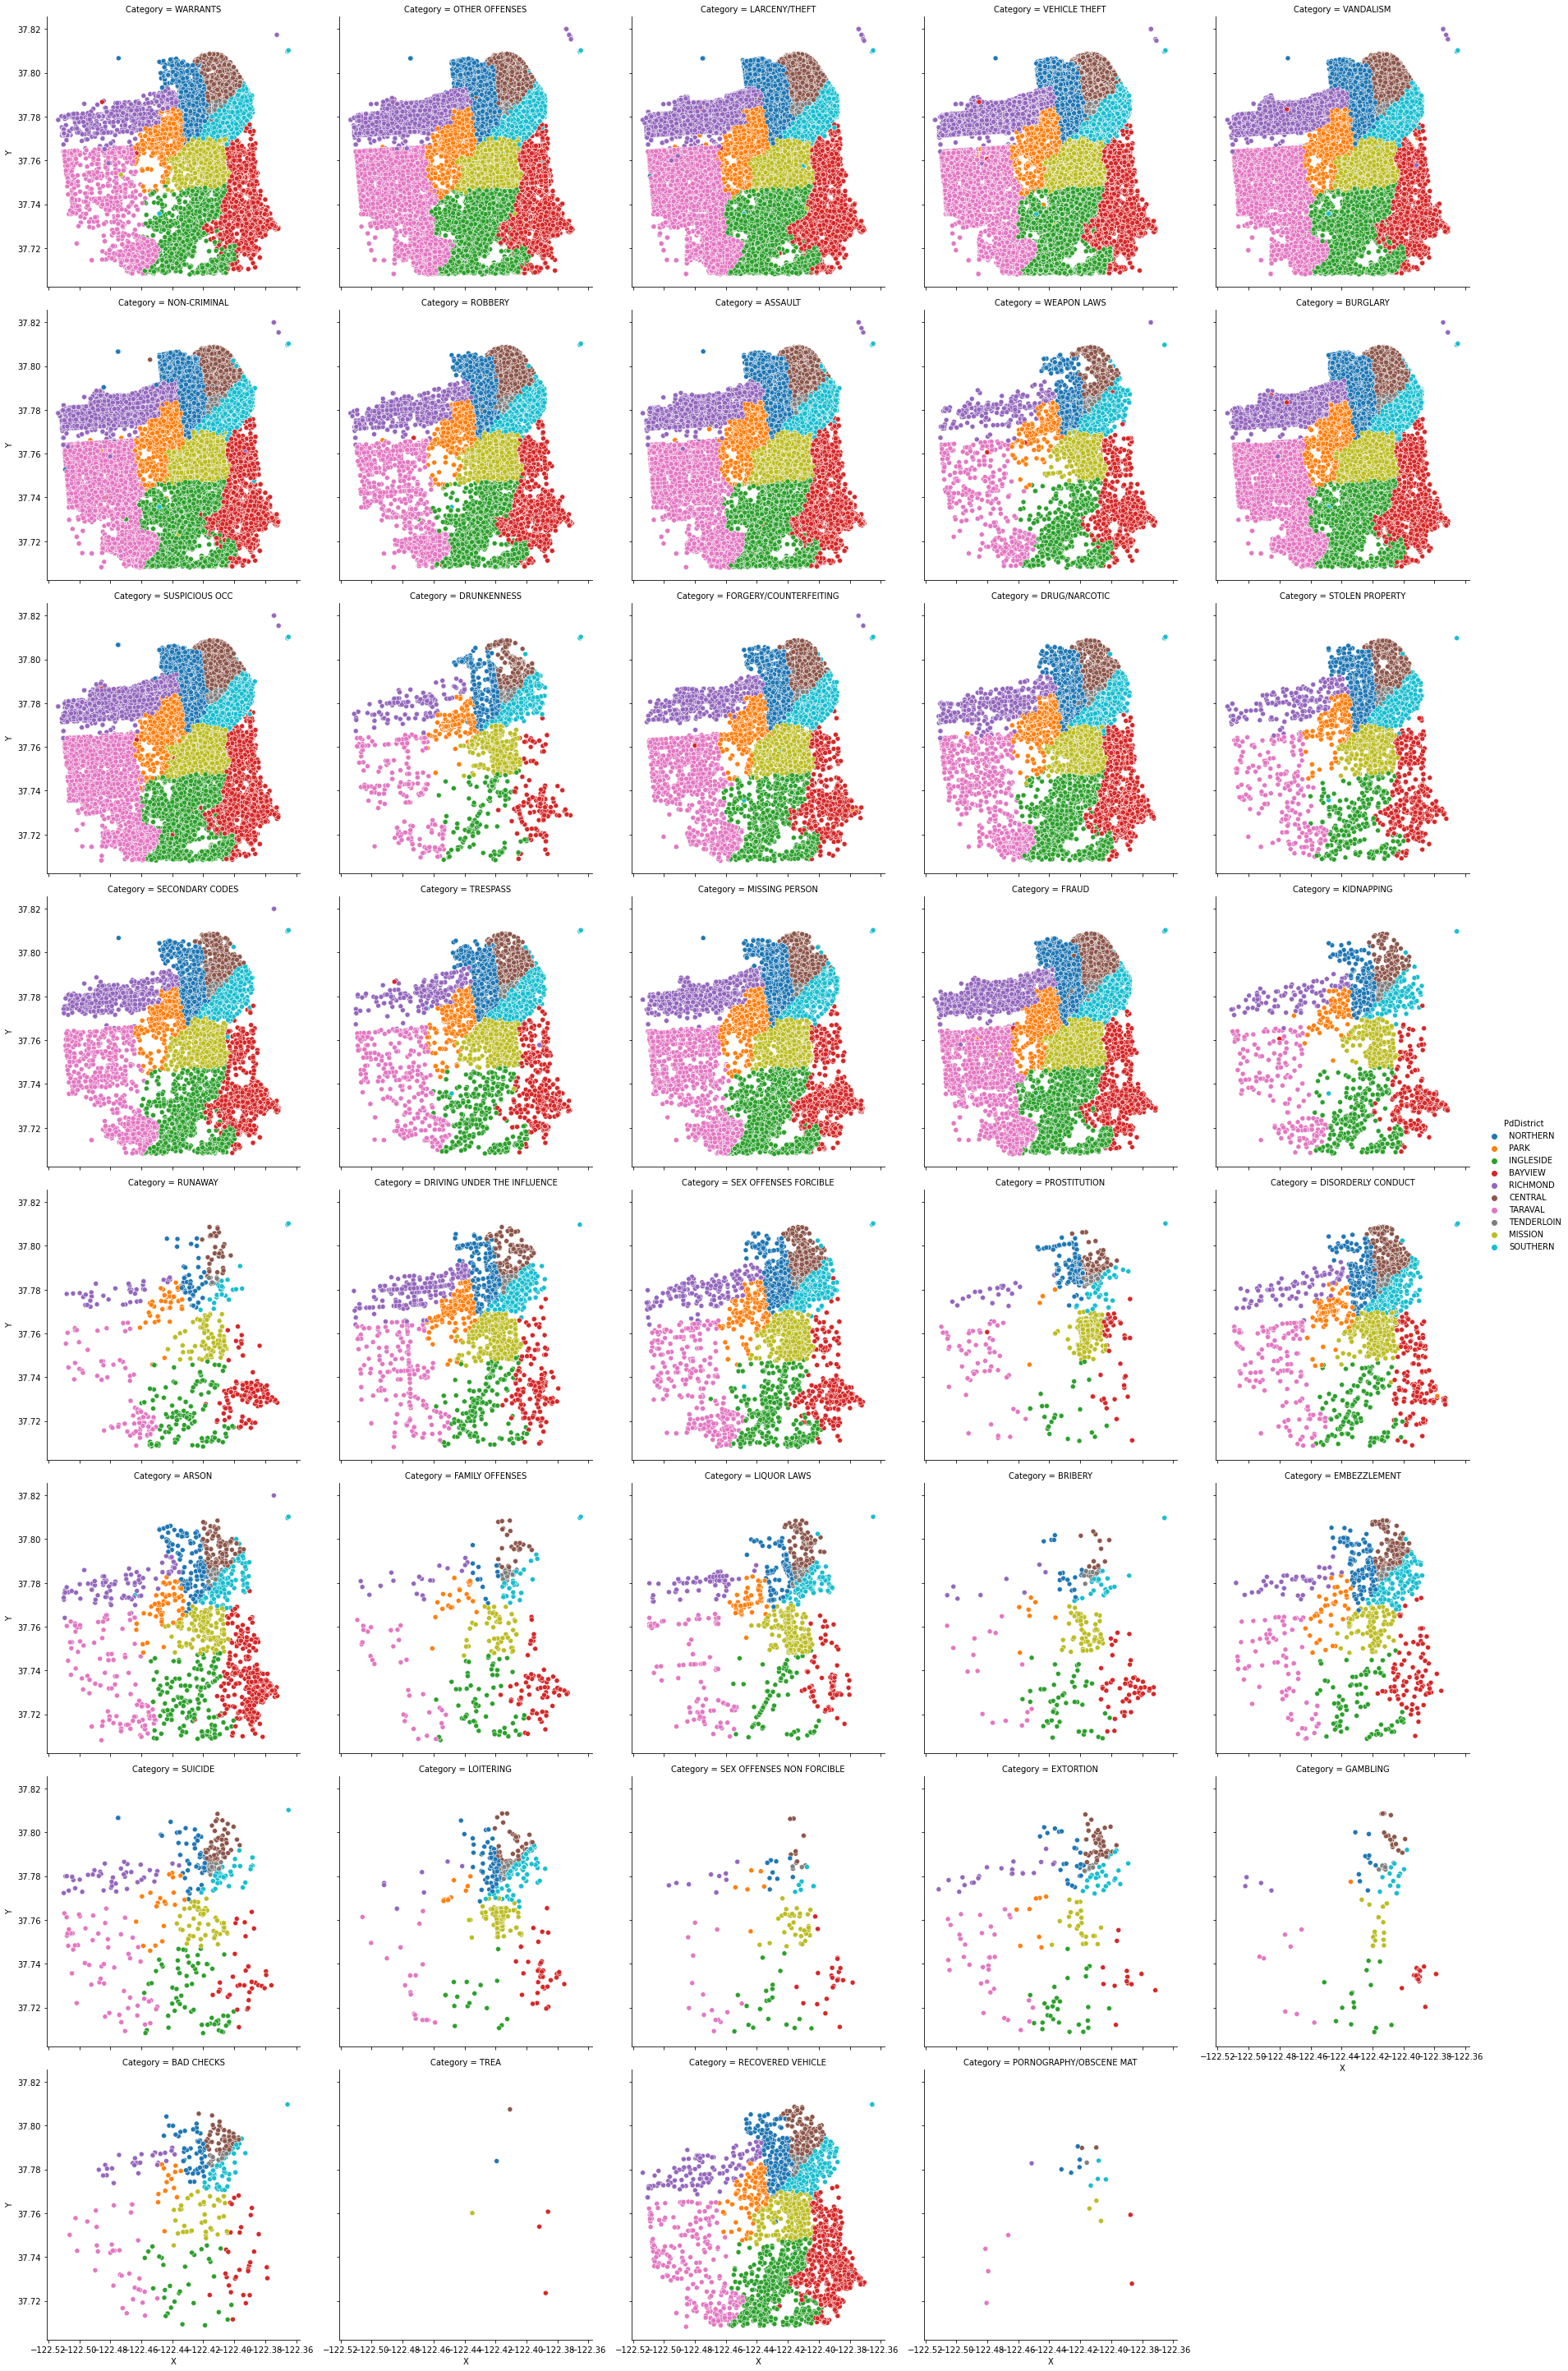

In [25]:
sns.relplot(data=train[train["Y"] < 80], 
            x="X", y="Y", hue="PdDistrict", 
            col="Category", col_wrap=5)

In [26]:
df['PdDistrict'].value_counts()
type(df['PdDistrict'].value_counts())
df_crime = df['PdDistrict'].value_counts().reset_index()
df_crime.columns = ['PdDistrict', 'Count']
df_crime

PdDistrict   Count
0    SOUTHERN  314638
1     MISSION  240357
2    NORTHERN  212313
3     BAYVIEW  179022
4     CENTRAL  171590
5  TENDERLOIN  163556
6   INGLESIDE  158929
7     TARAVAL  132213
8        PARK   99512
9    RICHMOND   90181

In [27]:
# https://www.kaggle.com/luckypen/san-francisco-crime-analysis
import folium
gjson = r'https://cocl.us/sanfran_geojson'
latitude = 37.77
longitude = -122.42
Sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
Sanfran_map.choropleth(
    geo_data=gjson,
    data=df_crime,
    columns=['PdDistrict', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate In San Francisco')
Sanfran_map

/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## 연도, 월, 요일, 시간

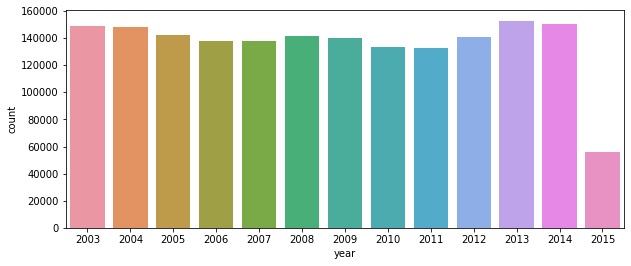

In [28]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="year")

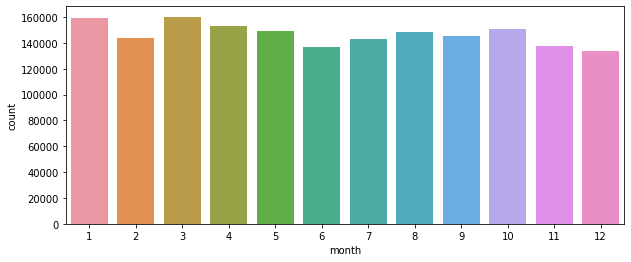

In [29]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="month")

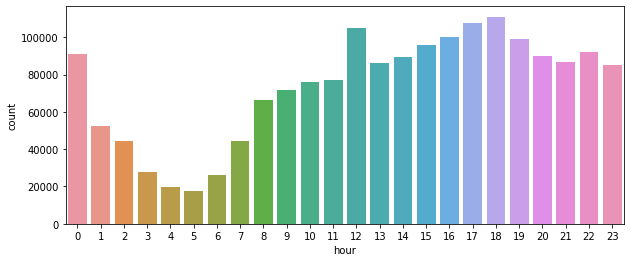

In [30]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="hour")

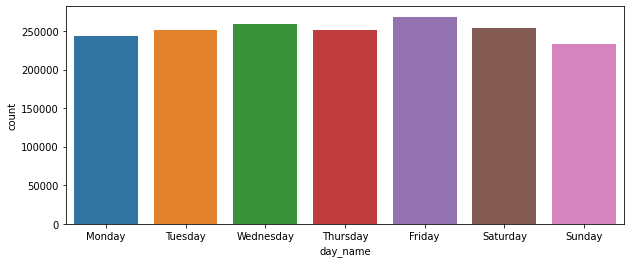

In [31]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df.sort_values("dayofweek"), x="day_name")

In [32]:
hour_category = pd.crosstab(df["hour"], df["Category"])
hour_category.style.background_gradient()

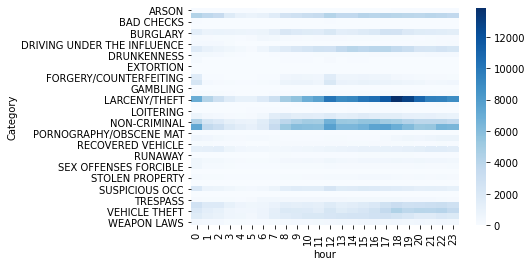

In [33]:
sns.heatmap(hour_category.T, cmap="Blues")

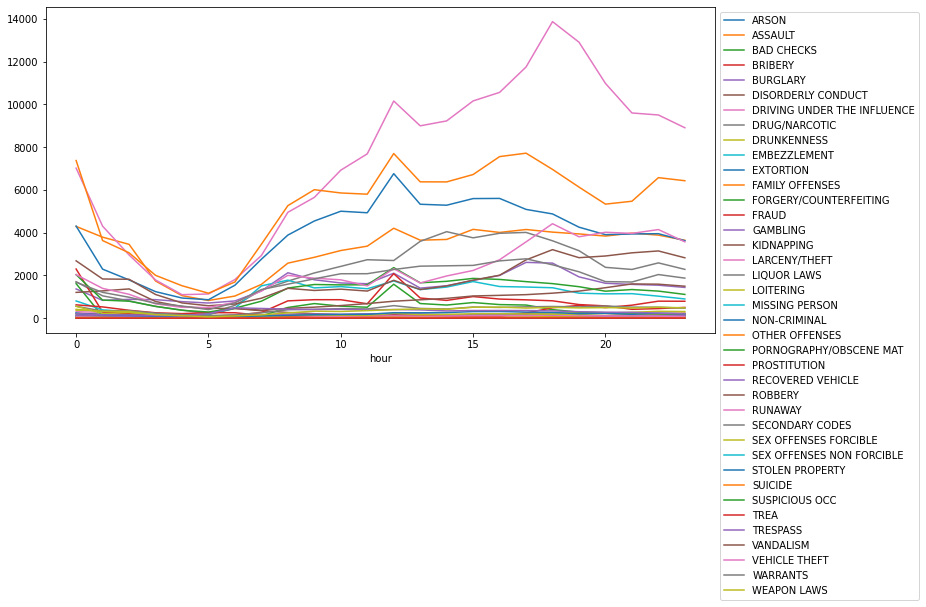

In [34]:
hour_category.plot(figsize=(12, 6)).legend(bbox_to_anchor=(1, 1))

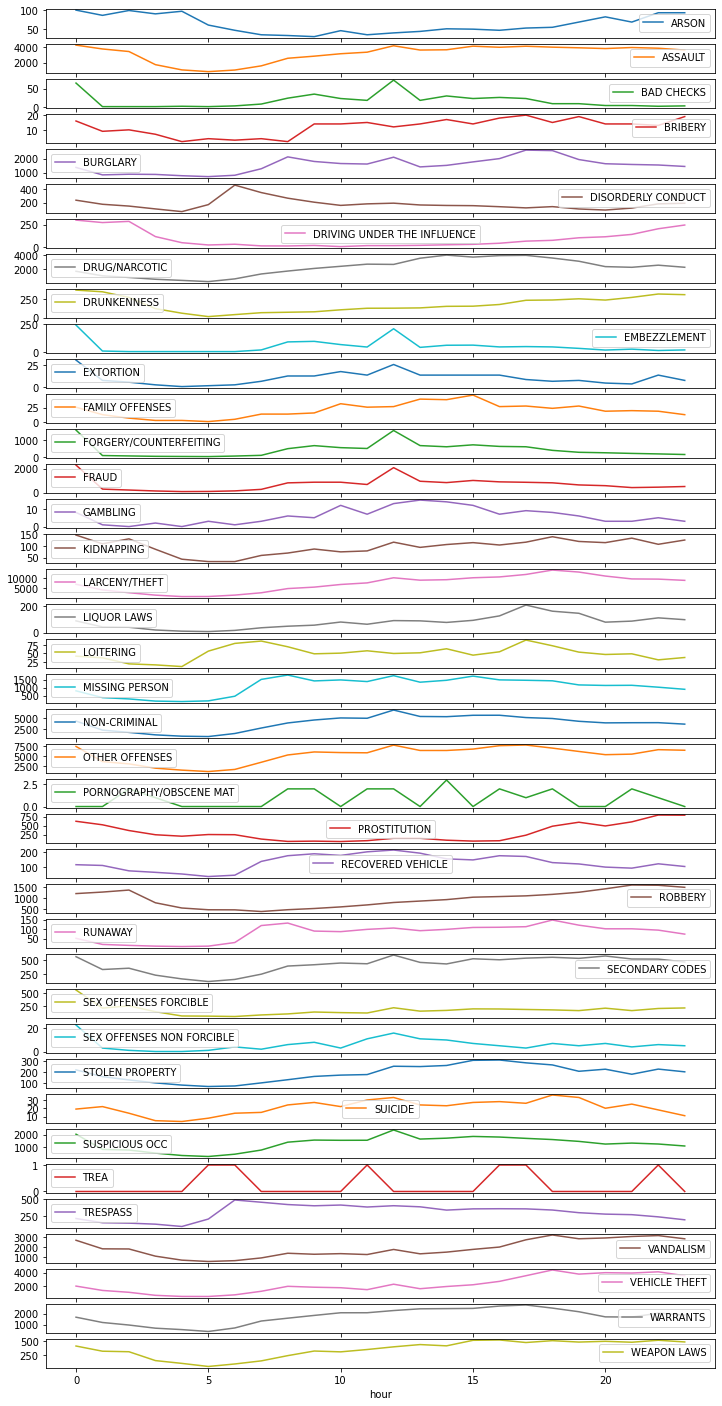

In [35]:
hour_category.plot(subplots=True, figsize=(12, 25))
plt.show()

In [36]:
# 상위 범죄 종류
top_category = df["Category"].value_counts().head(10).index
top_category

Index(['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT',
       'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS', 'BURGLARY',
       'SUSPICIOUS OCC'],
      dtype='object')

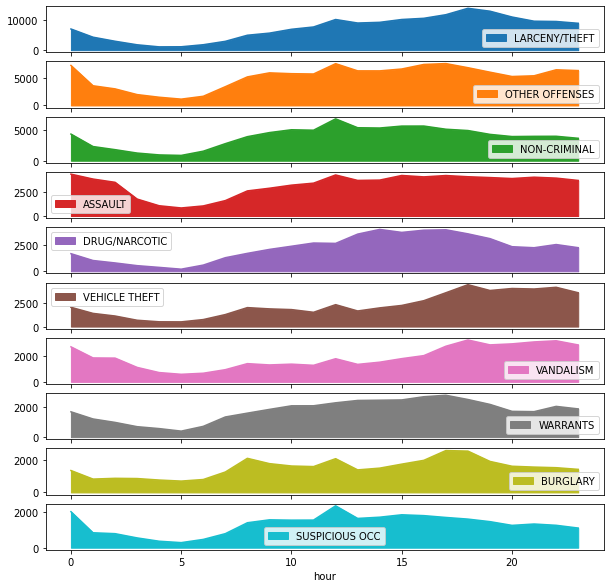

In [37]:
hour_category[top_category].plot(subplots=True, figsize=(10, 10), kind="area")
plt.show()

In [38]:
pdd_category = pd.crosstab(df["PdDistrict"], df["Category"])
pdd_category

Category    ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
PdDistrict                                                                      
BAYVIEW       393     9857          34       56      3930                 219   
CENTRAL       111     6977          65       12      4519                 494   
INGLESIDE     182     8533          32       53      3331                 171   
MISSION       145    11149          46       66      3745                1099   
NORTHERN      149     8318          54       18      5854                 452   
PARK           65     3515          15        7      2888                 271   
RICHMOND      103     3202          31        8      2696                 108   
SOUTHERN      185    12183          74       37      4841                 511   
TARAVAL       120     5463          36       17      3463                 162   
TENDERLOIN     60     7679          19       15      1488                 833   

Category    DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  \
PdDistrict                                                            
BAYVIEW                             179           4498          243   
CENTRAL                             160           1805          517   
INGLESIDE                           206           2373          190   
MISSION                             357           8757          782   
NORTHERN                            260           4511          368   
PARK                                176           2573          374   
RICHMOND                            319            999          149   
SOUTHERN                            306           9228          959   
TARAVAL                             202           1531          259   
TENDERLOIN                          103          17696          439   

Category    EMBEZZLEMENT  ...  SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY  \
PdDistrict                ...                                               
BAYVIEW              100  ...                         22              397   
CENTRAL              180  ...                          7              510   
INGLESIDE             78  ...                         22              347   
MISSION              124  ...                         35              631   
NORTHERN             131  ...                          9              700   
PARK                  50  ...                          6              175   
RICHMOND              43  ...                         10              206   
SOUTHERN             275  ...                         17             1007   
TARAVAL               94  ...                         15              231   
TENDERLOIN            91  ...                          5              336   

Category    SUICIDE  SUSPICIOUS OCC  TREA  TRESPASS  VANDALISM  VEHICLE THEFT  \
PdDistrict                                                                      
BAYVIEW          37            3906     3       636       5356           7219   
CENTRAL          60            2842     1       904       4469           4210   
INGLESIDE        65            3167     0       416       5374           8960   
MISSION          72            3808     1      1021       5294           7148   
NORTHERN         67            3270     1       780       5404           6291   
PARK             20            1656     0       290       2613           3963   
RICHMOND         42            2191     0       245       3180           4117   
SOUTHERN         59            5065     0      1456       6550           4725   
TARAVAL          59            2996     0       386       4869           6142   
TENDERLOIN       27            2513     0      1192       1616           1006   

Category    WARRANTS  WEAPON LAWS  
PdDistrict                         
BAYVIEW         4322         1647  
CENTRAL         2777          487  
INGLESIDE       2528         1130  
MISSION         6615         1329  
NORTHERN        4599          789  
PARK            2318    

In [39]:
pdd_category.T.style.background_gradient()

In [40]:
df["Address"].nunique()

24777

In [41]:
df["Address"].value_counts().head(10)

800 Block of BRYANT ST      53517
800 Block of MARKET ST      13464
2000 Block of MISSION ST    10052
1000 Block of POTRERO AV     8210
0 Block of TURK ST           6444
900 Block of MARKET ST       6256
0 Block of 6TH ST            5682
300 Block of ELLIS ST        5488
16TH ST / MISSION ST         5156
400 Block of ELLIS ST        5026
Name: Address, dtype: int64

In [42]:
df["Block"] = df["Address"].str.contains("Block", case=False)

In [43]:
df["Cross"] = df["Address"].str.contains("/")

In [44]:
pd.crosstab(df["Block"], df["Cross"])

Cross    False    True
Block                 
False        0  522976
True   1239335       0

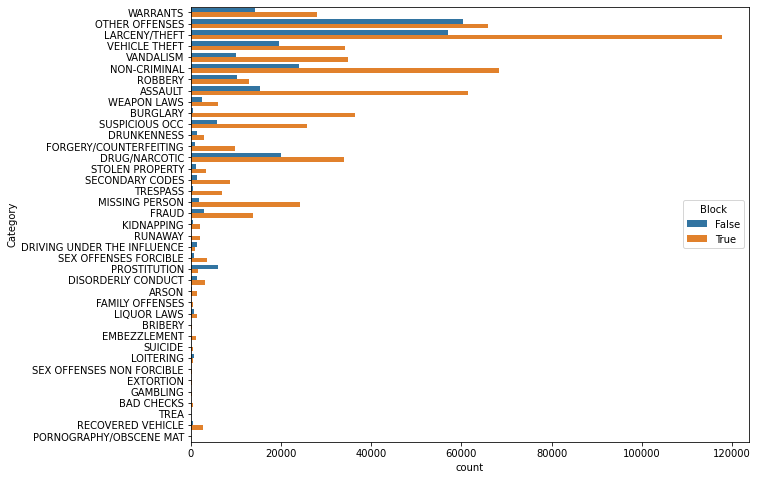

In [45]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y="Category", hue="Block")

In [46]:
pd.crosstab(train["Category"], train["Resolution"])

Resolution                   ARREST, BOOKED  ARREST, CITED  \
Category                                                     
ARSON                                   203              7   
ASSAULT                               23448           3547   
BAD CHECKS                               25              1   
BRIBERY                                 159              2   
BURGLARY                               4867             83   
DISORDERLY CONDUCT                     1507           1337   
DRIVING UNDER THE INFLUENCE            1939            185   
DRUG/NARCOTIC                         43749           4497   
DRUNKENNESS                            3275            217   
EMBEZZLEMENT                            163             23   
EXTORTION                                43              4   
FAMILY OFFENSES                         126             14   
FORGERY/COUNTERFEITING                 1940            119   
FRAUD                                  1907            461   
GAMBLING                                 39             39   
KIDNAPPING                             1014              9   
LARCENY/THEFT                          9913           5236   
LIQUOR LAWS                             904            713   
LOITERING                               328            744   
MISSING PERSON                          452            151   
NON-CRIMINAL                           3143           1599   
OTHER OFFENSES                        41213          47276   
PORNOGRAPHY/OBSCENE MAT                   5              4   
PROSTITUTION                           2331           4744   
RECOVERED VEHICLE                       195              3   
ROBBERY                                3882             54   
RUNAWAY                                   9              1   
SECONDARY CODES                        3246            100   
SEX OFFENSES FORCIBLE                   901            120   
SEX OFFENSES NON FORCIBLE                32              1   
STOLEN PROPERTY                        3659             89   
SUICIDE                                  17              1   
SUSPICIOUS OCC                          897            477   
TREA                                      3              0   
TRESPASS                               2363           2575   
VANDALISM                              2840           1447   
VEHICLE THEFT                          2023             90   
WARRANTS                              38790            444   
WEAPON LAWS                            4853            590   

Resolution                   CLEARED-CONTACT JUVENILE FOR MORE INFO  \
Category                                                              
ARSON                                                             1   
ASSAULT                                                          40   
BAD CHECKS                                                        0   
BRIBERY                                                           0   
BURGLARY                                                          3   
DISORDERLY CONDUCT                                                0   
DRIVING UNDER THE INFLUENCE                                       0   
DRUG/NARCOTIC                                                     4   
DRUNKENNESS                                                       0   
EMBEZZLEMENT                                                      0   
EXTORTION                                                         0   
FAMILY OFFENSES                                                   3   
FORGERY/COUNTERFEITING                                            1   
FRAUD                                                             0   
GAMBLING                                                          0   
KIDNAPPING                                                        1   
LARCENY/THEFT                                                     5   
LIQUOR LAWS                                                       0   
LOITERING                            